<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air quality mini-project

The context (what is the general subject, why is it important to you?)
A link to more information if this is available online
A description of the story you would like to tell from the data (e.g. visualisation of current and predicted trends, the proportion of each category, a correlation, a prediction from a decision type model, a set of summary statistics, etc)



# Aim
 Clean and wrangle air quality data

# About the data

There are two set of air quality data that measured based on NO2 at Chatham Roadside area between 2020 and 2021. 


## Data Source
The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The dataset can be viewed here: https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file

There is a second data set here covering the year 2021: https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ




## The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





There are 4 columns in the csv file :
Date, Time, Nitrogen dioxide, Status 

# Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

Import the modules / libraries that I need for this project.

In [134]:
from google.colab import files
import io

import pandas as pd
from datetime import datetime, time


## Data Retrieval

In [135]:
def get_data(url):
  df = pd.read_csv(url,skiprows = 1)
  return df 
  # upload a set of chosen files then read a specified file
  #uploaded = files.upload()
  #df = pd.read_excel(uploaded['air_quality.xlsx'],sheet_name="NO2-measured-data-2020-2021")
  #df = pd.read_csv(uploaded['air_quality_data.csv'])
  #os.chdir("smb://ZGEMMAH2H._smb._tcp.local/Harddisk/SDS Code Division_Python/")
  #df = pd.read_excel("air_quality.xlsx")

  #uploaded = files.upload()
  #df = pd.read_csv(io.BytesIO(uploaded['air_quality.xlsx']))
#program starts here  
url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/NO2-measured-data-2020-Rochester-Stoke.csv"
df = get_data(url)


## Inspect Data

Let's have a look some details about the dataset.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


In [137]:
display(df.head())
display(df.tail())


,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,35.65193,V µg/m³
1,01/01/2020,2:00,37.99122,V µg/m³
2,01/01/2020,3:00,35.70462,V µg/m³
3,01/01/2020,4:00,36.5796,V µg/m³
4,01/01/2020,5:00,32.9441,V µg/m³


,Date,Time,Nitrogen dioxide,Status
8779,31/12/2020,20:00,11.22419,V µg/m³
8780,31/12/2020,21:00,11.17037,V µg/m³
8781,31/12/2020,22:00,9.54137,V µg/m³
8782,31/12/2020,23:00,8.21683,V µg/m³
8783,31/12/2020,24:00:00,8.16537,V µg/m³


I will check if it contains any missing data.  

In [138]:
df.isnull().values.any()

False

## Clean, Sort and Wrangle the data

This is always the most important part of the whole process before starting any project. This function will be reusing later for 2nd dataset.

I notice the data needs to be cleaned and formated. 

The data type of Date and Time columns are not datetime, so we will need to convert them into datatime type. 

Some of the times have hour, minute and second but some only have hour and minute. 

We need to drop rows / columns that have no data or duplicates.

Nitrogen dioxide columns has float type of data, so we will need to convert them to float type. 

Status columns contains only the unit of the Nitrogen dioxide values. We won't need to analynise this column, so it can be dropped. 

The rests are creating more useful data columns, rename, and sorting. 


### Clean, Format, Sort, wrangle 
There's no null value in this dataset. If there's null value, you can use df.dropna(subset = ["Make", "Model"]) to drop rows where NA/NaN values exist in specific columns. 

However, there's rows in Nitrogen dioxide column showing 'nodata', we will need to drop off the rows. 

In [139]:
def process_data(df): 
  # Convert dates to date format
  df['Date'] = pd.to_datetime(df['Date'])
  # drop rows Time with 24
  indexTimes = df[(df['Time'] == '24:00:00')  | (df['Time'] == '24:00') ].index
  df.drop(indexTimes , inplace=True) 
  df["Time"]= pd.to_datetime(df["Time"]).dt.time

  # Drop a row by condition : Delete these row indexes from dataFrame
  indexNames = df[df['Nitrogen dioxide'] == 'nodata'].index  
  df.drop(indexNames , inplace=True) 

  #Convert the Nitrogen dioxide levels values to float type
  df['Nitrogen dioxide']=  df['Nitrogen dioxide'].astype(float)

  #Sort by Nitrogen dioxide level
  df.sort_values(by=['Nitrogen dioxide'])

  #Create a new column for 'Weekdays'
  df['Weekdays'] = df['Date'].dt.weekday
  df['Years'] = df['Date'].dt.year

  #Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)
  df.rename(columns = {'Nitrogen dioxide':'NO2 Level (V ug/m2)'}, inplace = True)

  #Remove the Status column
  df.drop("Status", axis=1, inplace=True)

  return df


In [140]:
df1_new = process_data(df)


In [141]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8309 entries, 0 to 8782
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8309 non-null   datetime64[ns]
 1   Time                 8309 non-null   object        
 2   NO2 Level (V ug/m2)  8309 non-null   float64       
 3   Weekdays             8309 non-null   int64         
 4   Years                8309 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 389.5+ KB


In [142]:
display(df1_new.head())
display(df1_new.tail())

,Date,Time,NO2 Level (V ug/m2),Weekdays,Years
0,2020-01-01,01:00:00,35.65193,2,2020
1,2020-01-01,02:00:00,37.99122,2,2020
2,2020-01-01,03:00:00,35.70462,2,2020
3,2020-01-01,04:00:00,36.57960,2,2020
4,2020-01-01,05:00:00,32.94410,2,2020


,Date,Time,NO2 Level (V ug/m2),Weekdays,Years
8778,2020-12-31,19:00:00,12.34481,3,2020
8779,2020-12-31,20:00:00,11.22419,3,2020
8780,2020-12-31,21:00:00,11.17037,3,2020
8781,2020-12-31,22:00:00,9.54137,3,2020
8782,2020-12-31,23:00:00,8.21683,3,2020


In [143]:
# The code below will run and test your code to see if you are returning the correct answer
actual = len(df1_new)
expected = 8309

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 8309


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [144]:
url2 = "https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ"
df2 = get_data(url2)

In [145]:
df2_new = process_data(df2)

In [146]:
def concat_data(df1,df2):
  concat_df = pd.concat([df1,df2])
  concat_df.groupby('Weekdays') #.size
  return concat_df


concated_df = concat_data(df1_new,df2_new)
concated_df

,Date,Time,NO2 Level (V ug/m2),Weekdays,Years
0,2020-01-01,01:00:00,35.65193,2,2020
1,2020-01-01,02:00:00,37.99122,2,2020
2,2020-01-01,03:00:00,35.70462,2,2020
3,2020-01-01,04:00:00,36.57960,2,2020
4,2020-01-01,05:00:00,32.94410,2,2020
...,...,...,...,...,...
8754,2021-12-31,19:00:00,15.64568,4,2021
8755,2021-12-31,20:00:00,12.51492,4,2021
8756,2021-12-31,21:00:00,14.00046,4,2021
8757,2021-12-31,22:00:00,10.04780,4,2021


In [147]:
concated_df['NO2 Level (V ug/m2)'].describe()

count    16626.000000
mean        14.571890
std         12.037828
min         -0.777430
25%          5.526103
50%         10.905460
75%         20.029380
max         82.596090
Name: NO2 Level (V ug/m2), dtype: float64

# Data Analyses

In [148]:
import numpy as np

## Basic Statistics

In [149]:
#Calculate some statistics on the level array for a specific column
def cal_statistics(df,col):
  nparray_col = np.array(df[col])
  # mean
  mean = np.mean(nparray_col)

  # total
  total = np.sum(nparray_col)
  
  # standard deviation
  stddev = np.std(nparray_col)

  return mean, stddev, total 

In [150]:
# find the years with the mean, total and stddev of no2 level
mean, stddev, total = cal_statistics(concated_df,'NO2 Level (V ug/m2)')
print('mean = ',"{:10.2f}".format(mean))
print('total =',"{:10.2f}".format(total))
print('standard deviation = ',"{:10.2f}".format(stddev))


mean =       14.57
total =  242272.25
standard deviation =       12.04


In [157]:
# find the years with the biggest and lowest no2 level
nparray_no2level = np.array(concated_df['NO2 Level (V ug/m2)'])
nparray_date = np.array(concated_df['Date'])

# get the max and min sea level
max_level = np.max(nparray_no2level)
min_level = np.min(nparray_no2level)

# get the index of max and min sea level  
max_index = np.where(nparray_no2level == max_level)
min_index = np.where(nparray_no2level == min_level)

# get the year of max and min from the max , min see level index
max_date = nparray_date[max_index][0] 
min_date = nparray_date[min_index][0] 
print("The NO2 level was highest at", "{:10.2f}".format(max_level), "in the date", max_date)
print("The NO2 level was lowest at", "{:10.2f}".format(min_level), "in the date", min_date)


The NO2 level was highest at      82.60 in the date 2021-11-29T00:00:00.000000000
The NO2 level was lowest at      -0.78 in the date 2021-10-27T00:00:00.000000000


## Pearson correlation coefficient
Use numpy corrcoef() function to get the correlation coefficient matrix.

In [169]:
# Pearson correlation coefficient
def cal_coef(df,col1,col2):
  #Calculate the Pearson correlation coefficient between year and the rise in sea level.
  # (Expected output: 0.98 when rounded to 2 decimal places)
  nparray_col1 = np.array(df[col1])
  nparray_col2 = np.array(df[col2])
  coef = np.corrcoef(nparray_col1,nparray_col2).round(decimals=2)
  return coef

col1 = 'Years'
col2 = 'NO2 Level (V ug/m2)'
coef_matrix = cal_coef(concated_df, col1, col2) 
print(f'correlation coefficient for {col1} and {col2} :\n',coef_matrix)

correlation coefficient for Years and NO2 Level (V ug/m2) :
 [[1.   0.36]
 [0.36 1.  ]]


In [167]:
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = coef_matrix[0,1]
expected = 0.36

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 0.36


## Linear Regression

# Visualisation 

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# Use Seaborn to draw a lineplot 
def draw_line_plot(x, y, xl,yl,color):
  plt.figure(figsize = (15,8))
  chart = sns.lineplot(x=x, y=y, color=color)
  chart.set_xlabel(xl, size=16)
  chart.set_ylabel(yl, size=16)
  plt.show()
  return


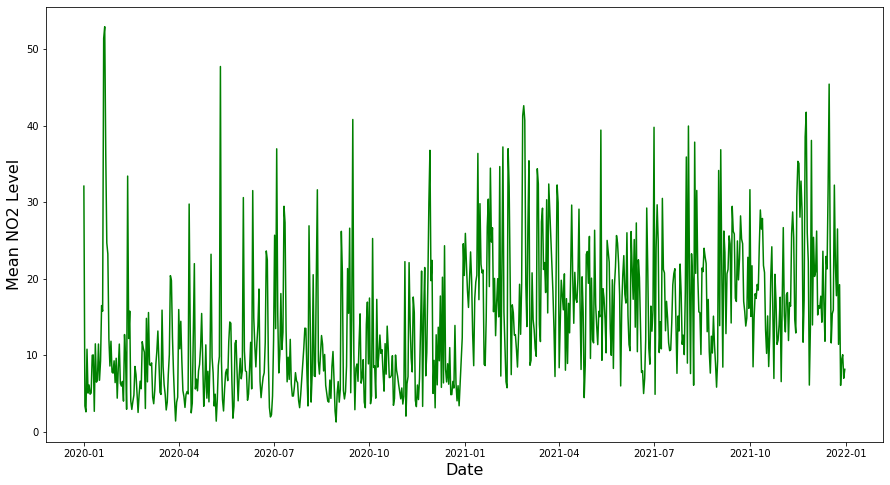

In [198]:
meanno2_data = concated_df.groupby(['Date'])['NO2 Level (V ug/m2)'].mean()
# print(meanrank_data)
labels = meanno2_data.keys()
draw_line_plot(labels, meanno2_data, 'Date', 'Mean NO2 Level','green')

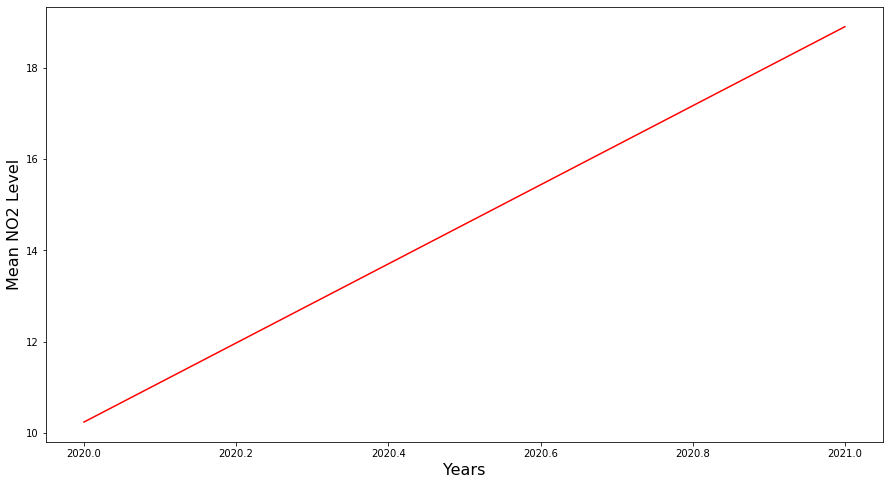

In [199]:

meanno2_data_byyears = concated_df.groupby(['Years'])['NO2 Level (V ug/m2)'].mean()
# print(meanrank_data)
labels = meanno2_data_byyears.keys()
draw_line_plot(labels, meanno2_data_byyears, 'Years', 'Mean NO2 Level','red')

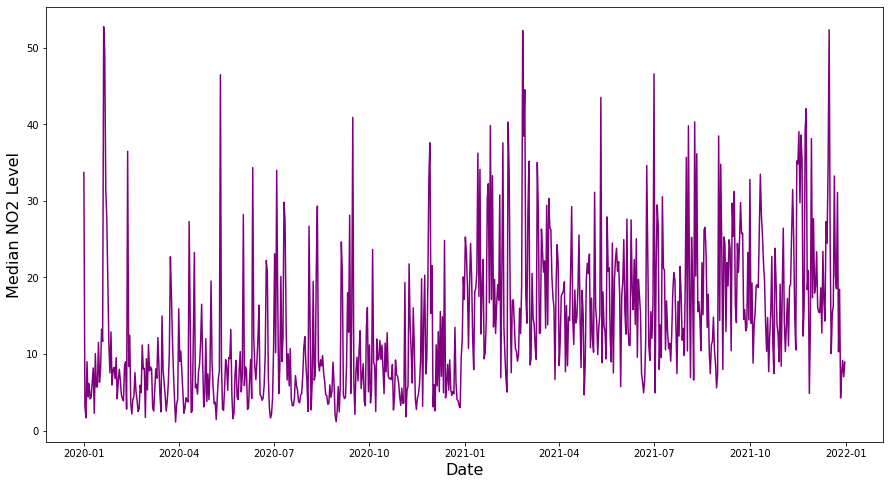

In [200]:
meanno2_data_median = concated_df.groupby(['Date'])['NO2 Level (V ug/m2)'].median()
# print(meanrank_data)
labels = meanno2_data_median.keys()
draw_line_plot(labels, meanno2_data_median, 'Date', 'Median NO2 Level','purple')

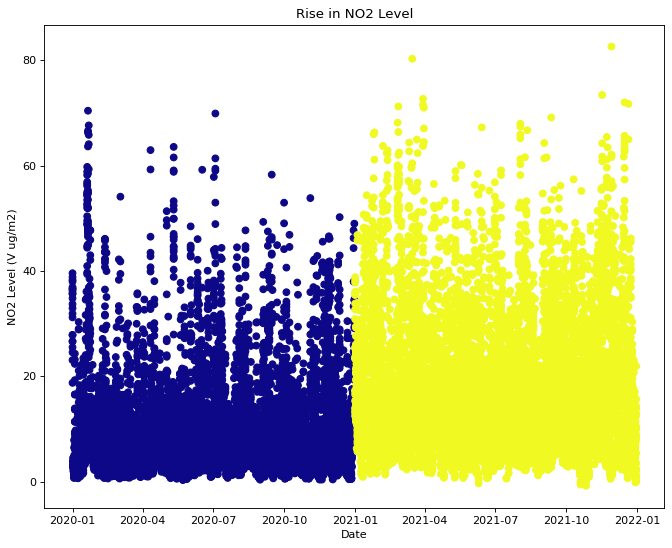

In [201]:
def draw_scatter_plot(df, col1, col2, title, colorbycol):
  col1_values = df[col1]
  col2_values = df[col2]
  plt.figure(figsize=(10, 8), dpi=80)
  plt.scatter(col1_values, col2_values, edgecolors='face', c=df[colorbycol], cmap='plasma')
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title(title)
  plt.show()

draw_scatter_plot(concated_df, 'Date', 'NO2 Level (V ug/m2)', 'Rise in NO2 Level', 'Years')

# Conclusion
What are the stand out things you have found through your coded analysis?



# Reflection

**What skills have you demonstrated in completing this notebook?**

Your answer: 

concatenating .concat() and Merging .merge(). Create pivot table with .pivot_table()

**What problems did you encounter and how did you solve them?**

Your answer: 

The most tricky parts are processing dataset.  

# Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
